In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import joblib
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("academic_stress_levels.csv")

In [3]:
#O objetivo dessa célula é ter um panorama geral dos dados.

pd.set_option("display.max_columns", None)

dataframe.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [4]:
#Trabalhar com espaços causa muito problema então foi tomada a decisão de renomear as colunas.

df_format = pd.DataFrame({'timestamp': dataframe['Timestamp'],
                       'academic_stage': dataframe['Your Academic Stage'],
                       'peer_pressure': dataframe['Peer pressure'],
                       'academic_pressure_home': dataframe['Academic pressure from your home'],
                       'study_environment': dataframe['Study Environment'],
                       'coping_strategy': dataframe['What coping strategy you use as a student?'],
                       'bad_habits': dataframe['Do you have any bad habits like smoking, drinking on a daily basis?'],
                       'academic_competition_level': dataframe['What would you rate the academic  competition in your student life'],
                       'academic_stress_index': dataframe['Rate your academic stress index ']})

In [5]:
#A coluna timestamp foi descartada pois não teria utilidade alguma daqui em diante.

df_format = df_format.drop('timestamp', axis =1)

In [6]:
#Construir um dicionário é sempre uma boa prática, principalmente em projetos mais longos ou com mais variáveis. Ajuda a se orientar e evita confusão.

df_dict = {
    "academic_stage": "Grau de educação do estudante.",
    "peer_pressure": "Pressão social",
    "academic_pressure_home": "Expectativas e pressão acadêmica exercida na casa do estudante.",
    "study_environment":"Descrição do ambiente de estudo.",
    "coping_strategy":"Estratégias para lidar com o stress e demais desafios.",
    "bad_habits":"Hábitos negativos que o estudante costuma recorrer devido ao stress.",
    "academic_competition_level":"Intensidade de competição entre os pares.",
    "academic_stress_index":"Intensidade de stress por motivos acadêmicos."
}

In [7]:
df_format.head()

,academic_stage,peer_pressure,academic_pressure_home,study_environment,coping_strategy,bad_habits,academic_competition_level,academic_stress_index
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [8]:
#O intuito aqui é checar os tipos de dados antes de aplicar o encoding. 

df_format.dtypes

academic_stage                object
peer_pressure                  int64
academic_pressure_home         int64
study_environment             object
coping_strategy               object
bad_habits                    object
academic_competition_level     int64
academic_stress_index          int64
dtype: object

In [9]:
#Neste bloco são definidas as variáveis categóricas que passarão pelo processo de encoding. 
#Devido ao tamanho do Dataset foi decidido utilizar a função "get_dummies" do panda ao invés de outras opções, como importar algum encoder do SKLearn.

categoricas = ['academic_stage', 'study_environment', 'coping_strategy', 'bad_habits']

df_enc = df_format.copy()
for c in categoricas:
    df_enc[c] = df_enc[c].astype('string')

df_enc = pd.get_dummies(df_enc, columns=categoricas, drop_first=True)
df_enc.head()

,peer_pressure,academic_pressure_home,academic_competition_level,academic_stress_index,academic_stage_post-graduate,academic_stage_undergraduate,study_environment_Peaceful,study_environment_disrupted,coping_strategy_Emotional breakdown (crying a lot),"coping_strategy_Social support (friends, family)",bad_habits_Yes,bad_habits_prefer not to say
0,4,5,3,5,False,True,False,False,False,False,False,False
1,3,4,3,3,False,True,True,False,False,False,False,False
2,1,1,2,4,False,True,True,False,False,True,False,False
3,3,2,4,3,False,True,True,False,False,False,False,False
4,3,3,4,5,False,True,True,False,False,False,False,False


In [10]:
#O objetivo era manter o dataset na mesma ordem inicial, então a coluna "acadmic_stress_index" foi movida para a última posição.

alvo = df_enc.pop('academic_stress_index') 
df_enc['academic_stress_index'] = alvo      

In [11]:
x = df_enc.drop(columns=['academic_stress_index'])
y = df_enc['academic_stress_index']

In [12]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=23)

In [13]:
'''Quando o trabalho envolve regressão linear não há necessidade de estratificar os registros em classes devido à natureza contínua da variável alvo.
Entretanto muitos algoritmos, quando não tem como requisito obrigatório, se beneficiam muito de dados padronizados, então é necessário criar um
objeto Scaler para normalizar os registros.'''

scaler = StandardScaler()

#O fit deve ser aplicado exclusivamente aos dados de treino.
scaler.fit(x_treino)

#A transformação é aplicada, enfim, aos devidos conjuntos.
x_treino_tf = scaler.transform(x_treino)
x_teste_tf = scaler.transform(x_teste)

In [14]:
# Modelo benchmark, random forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=23)
modelo_rf.fit(x_treino_tf, y_treino)
y_pred = modelo_rf.predict(x_teste_tf)

# Métricas
print(f"R² Score: {r2_score(y_teste, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_teste, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_teste, y_pred)):.3f}")

R² Score: 0.132
MAE: 0.826
RMSE: 1.007


Este resultado é terrível. Ao analisar as métricas MAE, RMSE ou qualquer outra que meça o erro médio da função, o esperado é que os resultados sejam os menores possíveis. Por outro lado, quanto maior for o valor de R²(máximo de 1.0), que representa o quanto a variável alvo é explicada pelas variáveis dependentes, melhor é para o modelo. 

Considerando os desafios na construção do modelo de classificação utilizando o mesmo conjunto de dados, esse resultado não é surpreendente. Inclusive mantém a janela aberta para os mesmos questionamentos acerca da qualidade e volume de dados a serem investigados. A correlação, seja positiva ou negativa, não é muito forte, isso já havia sido aferido e será novamente ilustrado. Entretanto antes de tirar alguma conclusão restam alternativas para tentar melhorar o resultado dessas métricas.

In [15]:
#O objetivo dessa célula é confirmar que não tem valores fora do range. Algoritmos de Regressão Linear costumam ser bem sensíveis à outliers.
df_enc.describe()  # vê min/max de cada coluna

,peer_pressure,academic_pressure_home,academic_competition_level,academic_stress_index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [16]:
#Função para filtrar e visualizar correlação
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    #Calcula a matriz de correlação
    corr = df.corr()
    
    #Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    #Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'viridis', center = 0)
    plt.show()

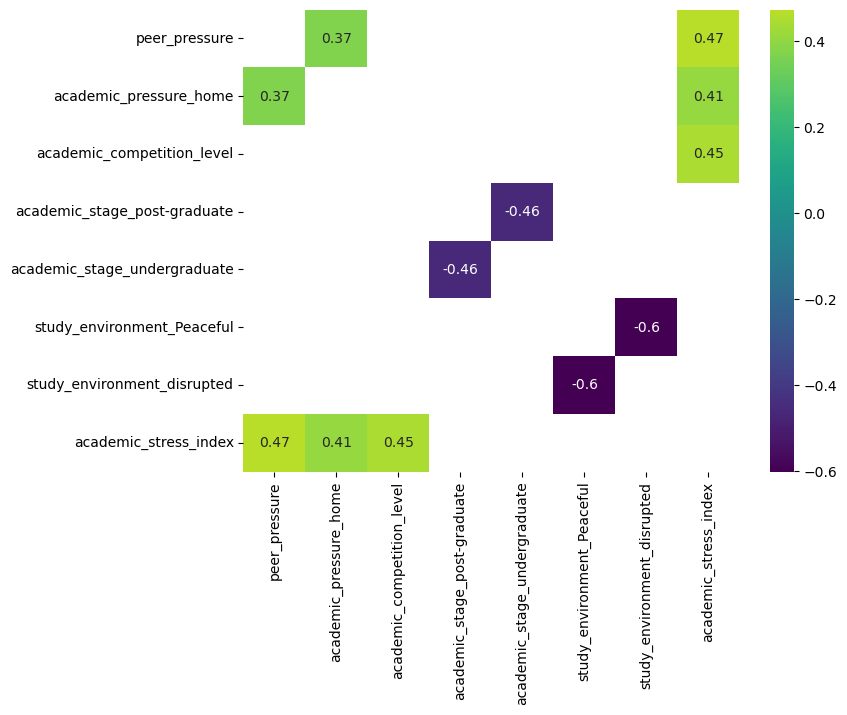

In [17]:
#O intuito principal do mapa de calor era investigar a intensidade da correlação entre as variáveis, por isso o limiar de 30% foi definido.
#No fim das contas não há nenhuma correlação que sequer chegue a 70% entre as variáveis.

filtrar_e_visualizar_correlacao(df_enc, threshold = 0.3, drop_column = None)

In [18]:
#Modelo 2 - Linear Regression
modelo_linear = LinearRegression()
modelo_linear.fit(x_treino_tf, y_treino)
y_pred_linear = modelo_linear.predict(x_teste_tf)


print("LINEAR REGRESSION:")
print(f"R² Score: {r2_score(y_teste, y_pred_linear):.3f}")
print(f"MAE: {mean_absolute_error(y_teste, y_pred_linear):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_teste, y_pred_linear)):.3f}")


print("\nCOMPARAÇÃO:")
print(f"Random Forest R²: 0.132")
print(f"Linear Regression R²: {r2_score(y_teste, y_pred_linear):.3f}")

LINEAR REGRESSION:
R² Score: 0.373
MAE: 0.743
RMSE: 0.856

COMPARAÇÃO:
Random Forest R²: 0.132
Linear Regression R²: 0.373


O Linear Regression é o algoritmo mais simples possível para modelos de regressão, normalmente usado como baseline. Apesar de ter tido uma performance significativamente maior do que o primeiro modelo ainda está abaixo do limite aceitável. O próximo algoritmo a ser testado possui, entre suas características principais, maior eficácia para datasets pequenos e captura relações não lineares, tornando-se uma ótima opção para esse caso.

In [19]:
#Modelo 3 - SVR
modelo_svr = SVR(kernel='rbf')
modelo_svr.fit(x_treino_tf, y_treino)
y_pred_svr = modelo_svr.predict(x_teste_tf)


print("SVR (Support Vector Regression):")
print(f"R² Score: {r2_score(y_teste, y_pred_svr):.3f}")
print(f"MAE: {mean_absolute_error(y_teste, y_pred_svr):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_teste, y_pred_svr)):.3f}")


print("\nCOMPARAÇÃO:")
print(f"Linear Regression R²: 0.373")
print(f"SVR R²: {r2_score(y_teste, y_pred_svr):.3f}")
print(f"Random Forest R²: 0.132")

SVR (Support Vector Regression):
R² Score: 0.403
MAE: 0.719
RMSE: 0.835

COMPARAÇÃO:
Linear Regression R²: 0.373
SVR R²: 0.403
Random Forest R²: 0.132


O SVR conseguiu um resultado quase 4x melhor do que o primeiro modelo testado, um indicativo da sua potência e eficácia, mas ainda abaixo do limite aceitável e relativamente longe dos 50%.    

A otimização de hiperparâmetros pode ser uma boa estratégia para melhorar a performance do modelo.

In [20]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # regularização
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # complexidade kernel
    'epsilon': [0.01, 0.1, 0.2]      # tolerância a erros
}

grid_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2')
grid_svr.fit(x_treino_tf, y_treino)

print(f"Melhores parâmetros: {grid_svr.best_params_}")
print(f"Melhor score CV: {grid_svr.best_score_:.3f}")

y_pred_best = grid_svr.predict(x_teste_tf)
print(f"R² otimizado: {r2_score(y_teste, y_pred_best):.3f}")

Melhores parâmetros: {'C': 10, 'epsilon': 0.2, 'gamma': 0.01}
Melhor score CV: 0.286
R² otimizado: 0.447


A otimização não foi capaz de elevar a performance do modelo a um patamar aceitável. Diante desse cenário não restam muitas opções: admitir que a capacidade máxima do modelo é inferior ao esperado ou exaurir as demais alternativas até esgotar as opções.     

Decidido a tomar o caminho mais longo, foram testados mais duas estratégias utilizando as regularizações L3 e L2. A regularização L3 remove variáveis irrelevantes enquanto estabiliza outras (é a combinação de L1 + L2), já a regularização Ridge (ou L2) mantém todas as variáveis e penaliza os coeficientes grandes. Ambas são boas estratégias para prevenir overfitting. 

In [21]:
# ElasticNet - combina L1 e L2 de forma mais suave, evitando a remoção mais agressiva de variáveis característica de L1.
modelo_elastic = ElasticNet(random_state=23)


param_grid_elastic = {
    'alpha': [0.01, 0.1, 1, 10],      
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] 
}

grid_elastic = GridSearchCV(modelo_elastic, param_grid_elastic, cv=5, scoring='r2')
grid_elastic.fit(x_treino_tf, y_treino)

print(f"Melhores parâmetros: {grid_elastic.best_params_}")
print(f"Melhor score CV: {grid_elastic.best_score_:.3f}")


y_pred_elastic = grid_elastic.predict(x_teste_tf)
print(f"ElasticNet R²: {r2_score(y_teste, y_pred_elastic):.3f}")

Melhores parâmetros: {'alpha': 0.1, 'l1_ratio': 0.9}
Melhor score CV: 0.334
ElasticNet R²: 0.367


In [22]:
# Ridge - L2 (não remove variáveis, só diminui influência) 
#Utilizado em sequência para conferir se a remoção de algumas variáveis em L3 diminuiu o R²
modelo_ridge = Ridge(random_state=23)

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100] 
}

grid_ridge = GridSearchCV(modelo_ridge, param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(x_treino_tf, y_treino)

print(f"Melhores parâmetros: {grid_ridge.best_params_}")
print(f"Melhor score CV: {grid_ridge.best_score_:.3f}")

# Teste
y_pred_ridge = grid_ridge.predict(x_teste_tf)
print(f"Ridge R²: {r2_score(y_teste, y_pred_ridge):.3f}")

Melhores parâmetros: {'alpha': 10}
Melhor score CV: 0.288
Ridge R²: 0.388


Tanto Elastic Net quanto Ridge não foram capazes de superar a performance do modelo SVR. As melhores opções de algoritmo já haviam sido exauridas e continuar a partir deste ponto seria muita obstinação. O limite máximo do modelo nas circunstãncias atuais, de fato, era o resultado insatisfatório alcançado nas células anteriores.     

In [23]:
print("COMPARAÇÃO DOS MODELOS EXPLORATÓRIOS:")
print("-" * 55)

print(f"Random Forest      | R²: {r2_score(y_teste, y_pred):.3f}")
print(f"Linear Regression  | R²: {r2_score(y_teste, y_pred_linear):.3f}")
print(f"SVR Básico         | R²: {r2_score(y_teste, y_pred_svr):.3f}")
print(f"Ridge              | R²: {r2_score(y_teste, y_pred_ridge):.3f}")
print(f"Elastic Net        | R²: {r2_score(y_teste, y_pred_elastic):.3f}")


print("-" * 55)
print("Melhor modelo baseline para otimização: SVR")

COMPARAÇÃO DOS MODELOS EXPLORATÓRIOS:
-------------------------------------------------------
Random Forest      | R²: 0.132
Linear Regression  | R²: 0.373
SVR Básico         | R²: 0.403
Ridge              | R²: 0.388
Elastic Net        | R²: 0.367
-------------------------------------------------------
Melhor modelo baseline para otimização: SVR


In [24]:
#Melhor Modelo - SVR


modelo_final = SVR(kernel='rbf', C=10, epsilon=0.2, gamma=0.01)
modelo_final.fit(x_treino_tf, y_treino)


y_pred_final = modelo_final.predict(x_teste_tf)


r2_final = r2_score(y_teste, y_pred_final)
mae_final = mean_absolute_error(y_teste, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_teste, y_pred_final))


#Esse trecho de código salvando o modelo foi adicionado posteriormente, quando a decisão de criar um sistema integrando o classificador e o regressor foi tomada.
joblib.dump(modelo_final, 'modelo_regressor_svr.pkl')
joblib.dump(scaler, 'scaler_regressao.pkl')

print("Modelo SVR salvo!")
print("Scaler salvo!")

print("MODELO FINAL - SVR OTIMIZADO:")
print(f"R² Score: {r2_final:.3f}")
print(f"MAE: {mae_final:.3f}")
print(f"RMSE: {rmse_final:.3f}")

print(f"\nINTERPRETAÇÃO DOS RESULTADOS:")
print(f"O modelo explica {r2_final*100:.1f}% da variância do stress acadêmico")
print(f"Erro médio de {mae_final:.2f} pontos na escala de 1-5")
print(f"Performance resultante das seguintes limitações do dataset:")
print(f"  - Apenas 140 amostras disponíveis")
print(f"  - Correlações fracas entre variáveis (< 70%)")
print(f"  - Natureza complexa do fenômeno comportamental estudado")

Modelo SVR salvo!
Scaler salvo!
MODELO FINAL - SVR OTIMIZADO:
R² Score: 0.447
MAE: 0.654
RMSE: 0.804

INTERPRETAÇÃO DOS RESULTADOS:
O modelo explica 44.7% da variância do stress acadêmico
Erro médio de 0.65 pontos na escala de 1-5
Performance resultante das seguintes limitações do dataset:
  - Apenas 140 amostras disponíveis
  - Correlações fracas entre variáveis (< 70%)
  - Natureza complexa do fenômeno comportamental estudado


Esta seria a última célula encerrando o projeto. Contudo, durante a conclusão, a possibilidade do problema de desempenho ser decorrente da falta de registros foi cogitada, e então surgiu a necessidade de validar esta hipótese.     

Através do método SMOTE, o mesmo utilizado para o balanceamento de classes, a quantidade de registros foi sinteticamente ampliada para conter 2.000 entradas ao invés de 140. Os registros criados seguem o mesmo padrão dos dados originais.

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

#EXPERIMENTO: TESTE COM DADOS SINTÉTICOS

#Precisa fazer a conversão toda vez que vai usar SMOTE....
x_numpy = x.values.astype(float) 
y_numpy = y.values.astype(int) if hasattr(y, 'values') else np.array(y).astype(int)

print(f"Tipos convertidos: {x_numpy.dtype}, {y_numpy.dtype}")
print(f"Shape: {x_numpy.shape}")

smote = SMOTE(random_state=23, k_neighbors=3)
x_temp, y_temp = smote.fit_resample(x_numpy, y_numpy)

x_synth, y_synth = resample(x_temp, y_temp, n_samples=2000, random_state=23)

print(f"Dataset original: {len(x_numpy)} amostras")
print(f"Dataset sintético: {len(x_synth)} amostras")

scaler_synth = StandardScaler()
x_synth_scaled = scaler_synth.fit_transform(x_synth)

x_train_synth, x_test_synth, y_train_synth, y_test_synth = train_test_split(
    x_synth_scaled, y_synth, test_size=0.2, random_state=23
)


modelo_synth = SVR(kernel='rbf', C=10, epsilon=0.2, gamma=0.01)
modelo_synth.fit(x_train_synth, y_train_synth)
y_pred_synth = modelo_synth.predict(x_test_synth)


r2_synth = r2_score(y_test_synth, y_pred_synth)

print("\n" + "-"*50)
print("COMPARAÇÃO: DADOS REAIS vs SINTÉTICOS")
print("-"*50)
print(f"Dados REAIS:     R² = 0.447")
print(f"Dados SINTÉTICOS: R² = {r2_synth:.3f}")

if r2_synth > 0.7:
    print("O problema era FALTA DE DADOS!")
elif r2_synth < 0.6:
    print("O problema está nas correlações fracas.")
else:
    print("Não foi possível identificar com precisão qual era o problema.")

Tipos convertidos: float64, int64
Shape: (140, 11)
Dataset original: 140 amostras
Dataset sintético: 2000 amostras

--------------------------------------------------
COMPARAÇÃO: DADOS REAIS vs SINTÉTICOS
--------------------------------------------------
Dados REAIS:     R² = 0.447
Dados SINTÉTICOS: R² = 0.844
O problema era FALTA DE DADOS!


Dessa maneira foi possível validar a hipótese de que a falta de dados era, de fato, o principal fator responsável pela baixa performance do modelo.